# This is my first notebook in the Kaggle competitions as a beginner

In [1]:
# Your input will be greatly appreciated as some of the methods i use here can be greatly improved

In [2]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
def details_null_columns(df):
    """ This is a function that returns a provides information on the columns that have null values,\
    and how many are in each such column
    """

# We first create a variable 'empty_columns', that shows each column and the number of null values, if any

    empty_columns = df.isnull().sum()

# Then we convert those values into an array

    array_empty = empty_columns.values

# Next we create a list of all the column names in the dataset(df)

    columns = list(df.columns)

# Then we create a list of each column and its number of null values

    nulls = list(zip(columns, array_empty))

# But we are only interested in only those columns that have null values:

    for i in nulls:
        if i[1] !=0:
            print(f"Feature {i[0]} has {i[1]} null values" )

In [5]:
def null_columns(df):
    """ This function takes a dataset (df) and extracts a subset of all the columns that have null values.\
    This is useful when one needs to work on them to fill those null values, especially with a very \
    large dataset."""
    
# First, we get a list of all the columns in the dataset:
    all_columns = df.columns
    
# Then we extract all those columns that have null values:
    df.isnull().sum() > 0
    
# Next, we extract from all columns, all the columns that have null values:
    null_columns = all_columns[df.isnull().sum() > 0]
    
# Finally, we extract the dataframe that has columns with null values:
    return df.loc[:, null_columns]

In [6]:
df.shape

(1460, 81)

The data has 1460 rows and 81 columns, of which 18 of them contain null values. These need to be dealt with at some stage

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

There are 35 numerical variables/features and 43 categorical variables in the dataset. We need to do\
data pre-processing so as to get rid of null values, identify and correct errors in the data (cleaning)\
identify those input variables/features that are most relevant to the task (feature selection), change the\
scale or distribution of some of the variables (transformation), derive new variables from the available \
data (feature engineering) as well as creating compact projections of the data (dimensionality reduction).

In [9]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# 1. Select those variables to be used as features and targets for the predictive model.

The variable **'SalePrice'** will be used as the target variable for this project as we seek to predict the selling\
price of houses in the Ames housing dataset.

In [10]:
y = df['SalePrice']

In [11]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The remaining 80 variables will be taken as the **features** or explanatory variables in the prediction of house prices.

# 2. Review the data that has been collected.

# 3. Summarize the collected data using statistical methods.

# 4. Visualize the collected data using plots and charts.

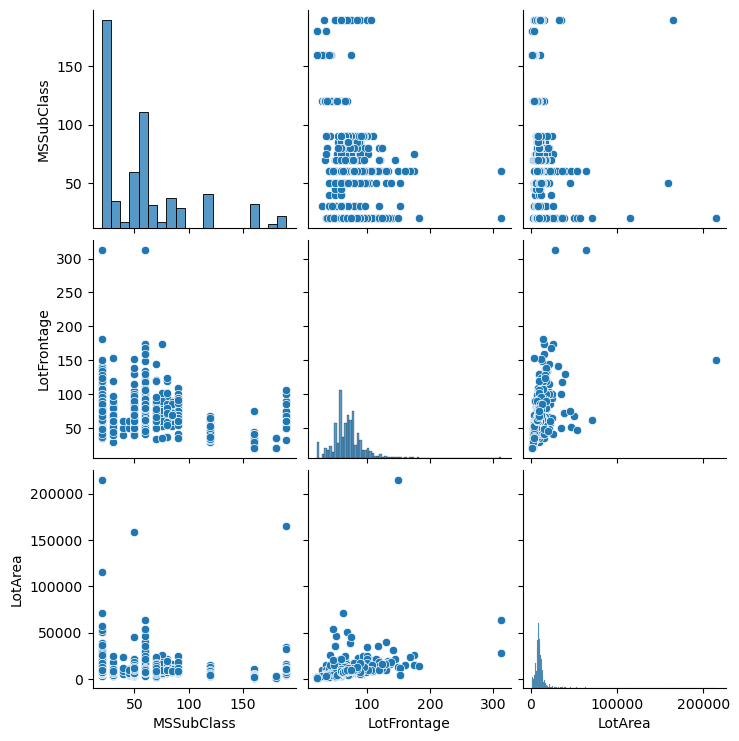

In [13]:
cols = df.columns[1:6]
sns.pairplot(df[cols])

In [14]:
sns.pairplot?